In [5]:
# import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Feature Selection (Continued) and Backtesting

## Feature Selection (Continued)

In [52]:
# Load the data
with open('X.pkl', 'rb') as file:
    X = pickle.load(file)

with open('X_train.pkl', 'rb') as file:
    X_train = pickle.load(file)

with open('X_cv.pkl', 'rb') as file:
    X_cv = pickle.load(file)

with open('X_test.pkl', 'rb') as file:
    X_test = pickle.load(file)

with open('y.pkl', 'rb') as file:
    y = pickle.load(file)

with open('y_train.pkl', 'rb') as file:
    y_train = pickle.load(file)

with open('y_cv.pkl', 'rb') as file:
    y_cv = pickle.load(file)

with open('y_test.pkl', 'rb') as file:
    y_test = pickle.load(file)

with open('prices.pkl', 'rb') as file:
    prices = pickle.load(file)

with open('prices_train.pkl', 'rb') as file:
    prices_train = pickle.load(file)

with open('prices_cv.pkl', 'rb') as file:
    prices_cv = pickle.load(file)

with open('prices_test.pkl', 'rb') as file:
    prices_test = pickle.load(file)

### PCA

In [7]:
from sklearn.decomposition import PCA

# Define the datasets
datasets = {'X_train': X_train, 'X_cv': X_cv, 'X_test': X_test}

# Initialize PCA and fit it to the training data
pca = PCA(n_components=2)
pca.fit(X_train)

# Initialize dictionaries to store the transformed data
transformed_data = {}
transformed_data_df = {}

# Transform and convert the datasets
for name, data in datasets.items():
    transformed_data[name] = pca.transform(data)
    transformed_data_df[name] = pd.DataFrame(transformed_data[name], columns=[f'PC{i+1}' for i in range(transformed_data[name].shape[1])])

# Print the head of the transformed DataFrames
for name, df in transformed_data_df.items():
    print(f"{name}_pca_df.head():")
    print(df.head())

X_train_pca_df.head():
            PC1           PC2
0 -3.799823e+08  3.574709e+08
1 -3.843273e+08  3.555559e+08
2 -3.831247e+08  3.549867e+08
3 -3.795958e+08  3.529777e+08
4 -3.746756e+08  3.526910e+08
X_cv_pca_df.head():
            PC1           PC2
0  3.385784e+08  1.934157e+07
1  3.901904e+08  1.122044e+07
2  4.289743e+08 -2.929905e+06
3  4.743324e+08 -2.094481e+07
4  5.144399e+08 -4.074275e+07
X_test_pca_df.head():
            PC1           PC2
0 -1.145502e+08  1.422208e+08
1 -1.048860e+08  1.345308e+08
2 -8.485811e+07  1.359601e+08
3 -6.302100e+07  1.359703e+08
4 -4.997230e+07  1.331155e+08


In [96]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
nb = GaussianNB()
log_reg = make_pipeline(StandardScaler(), LogisticRegression())
svm =  make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=37))
dt = DecisionTreeClassifier(random_state=37)
rf = RandomForestClassifier(random_state=37)

models = {'knn': knn, 'nb': nb, 'log_reg': log_reg, 'svm': svm, 'dt': dt, 'rf': rf}

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Dictionary to store the results
results = {}

# Iterate over each model in the models set
for model_name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Predict the target values for the cross-validation set
    y_cv_pred = model.predict(X_cv)
    
    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_cv, y_cv_pred)
    precision = precision_score(y_cv, y_cv_pred)
    recall = recall_score(y_cv, y_cv_pred)
    
    # Store the results in the dictionary
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': confusion_matrix(y_cv, y_cv_pred)
    }

/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP

In [10]:
# Print the results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  Confusion Matrix:")
    print(f"         Predicted 0  Predicted 1")
    print(f"Actual 0    {metrics['confusion_matrix'][0, 0]}          {metrics['confusion_matrix'][0, 1]}")
    print(f"Actual 1    {metrics['confusion_matrix'][1, 0]}          {metrics['confusion_matrix'][1, 1]}")
    print()

knn:
  Accuracy: 0.4737
  Precision: 0.5612
  Recall: 0.2921
  Confusion Matrix:
         Predicted 0  Predicted 1
Actual 0    147          61
Actual 1    189          78

nb:
  Accuracy: 0.5537
  Precision: 0.5647
  Recall: 0.8989
  Confusion Matrix:
         Predicted 0  Predicted 1
Actual 0    23          185
Actual 1    27          240

log_reg:
  Accuracy: 0.5179
  Precision: 0.5864
  Recall: 0.4831
  Confusion Matrix:
         Predicted 0  Predicted 1
Actual 0    117          91
Actual 1    138          129

svm:
  Accuracy: 0.4400
  Precision: 0.5556
  Recall: 0.0187
  Confusion Matrix:
         Predicted 0  Predicted 1
Actual 0    204          4
Actual 1    262          5

dt:
  Accuracy: 0.4779
  Precision: 0.5333
  Recall: 0.5693
  Confusion Matrix:
         Predicted 0  Predicted 1
Actual 0    75          133
Actual 1    115          152

rf:
  Accuracy: 0.4526
  Precision: 0.5294
  Recall: 0.2360
  Confusion Matrix:
         Predicted 0  Predicted 1
Actual 0    152         

In [ ]:
knn2 = make_pipeline(StandardScaler(), KNeighborsClassifier())
nb2 = GaussianNB()
log_reg2 = make_pipeline(StandardScaler(), LogisticRegression())
svm2 =  make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=37))
dt2 = DecisionTreeClassifier(random_state=37)
rf2 = RandomForestClassifier(random_state=37)

models2= {'knn': knn2, 'nb': nb2, 'log_reg': log_reg2, 'svm': svm2, 'dt': dt2, 'rf': rf2}

In [ ]:
# Dictionary to store the results
results2 = {}

# Iterate over each model in the models set
for model_name, model in models2.items():
    # Fit the model to the training data
    model.fit(transformed_data_df['X_train'], y_train)
    
    # Predict the target values for the cross-validation set
    y_cv_pred = model.predict(transformed_data_df['X_cv'])
    
    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_cv, y_cv_pred)
    precision = precision_score(y_cv, y_cv_pred)
    recall = recall_score(y_cv, y_cv_pred)
    
    # Store the results in the dictionary
    results2[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': confusion_matrix(y_cv, y_cv_pred)
    }

/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arra

In [13]:
# Print the results
for (model_name, metrics), (model_name2, metrics2) in zip(results.items(), results2.items()):
    print(f"{model_name}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f} -> {metrics2['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f} -> {metrics2['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f} -> {metrics2['recall']:.4f}")
    print(f"  Confusion Matrix:")
    print(f"          Predicted 0  Predicted 1")
    print(f"Actual 0    {metrics['confusion_matrix'][0, 0]} -> {metrics2['confusion_matrix'][0, 0]}  {metrics['confusion_matrix'][0, 1]} -> {metrics2['confusion_matrix'][0, 1]}")
    print(f"Actual 1    {metrics['confusion_matrix'][1, 0]} -> {metrics2['confusion_matrix'][1, 0]}  {metrics['confusion_matrix'][1, 1]} -> {metrics2['confusion_matrix'][1, 1]}")
    print()

knn:
  Accuracy: 0.4737 -> 0.5347
  Precision: 0.5612 -> 0.5927
  Recall: 0.2921 -> 0.5506
  Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0    147 -> 107  61 -> 101
Actual 1    189 -> 120  78 -> 147

nb:
  Accuracy: 0.5537 -> 0.5621
  Precision: 0.5647 -> 0.5621
  Recall: 0.8989 -> 1.0000
  Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0    23 -> 0  185 -> 208
Actual 1    27 -> 0  240 -> 267

log_reg:
  Accuracy: 0.5179 -> 0.5621
  Precision: 0.5864 -> 0.5621
  Recall: 0.4831 -> 1.0000
  Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0    117 -> 0  91 -> 208
Actual 1    138 -> 0  129 -> 267

svm:
  Accuracy: 0.4400 -> 0.5621
  Precision: 0.5556 -> 0.5621
  Recall: 0.0187 -> 1.0000
  Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0    204 -> 0  4 -> 208
Actual 1    262 -> 0  5 -> 267

dt:
  Accuracy: 0.4779 -> 0.5032
  Precision: 0.5333 -> 0.5660
  Recall: 0.5693 -> 0.4981
  Confusion Matrix:
          Predicted 0  Predicted 1
Actua

### Lasso

In [15]:
# Define different values of lambda (regularization strength)
lambdas = [0.1, 1, 10]

# Dictionary to store features with non-zero coefficients for each lambda
non_zero_features = {}

# Dictionary to store the results for log_reg_lasso
result_log_reg_lasso = {}

# Iterate over each lambda value
for l in lambdas:
    # Create a logistic regression model with Lasso regularization
    log_reg_lasso = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', C=1/l, solver='liblinear'))
    
    # Fit the model to the training data
    log_reg_lasso.fit(X_train, y_train.values.ravel())
    
    # Get the coefficients from the logistic regression model
    coefficients = log_reg_lasso.named_steps['logisticregression'].coef_[0]
    
    # Get the feature names
    feature_names = X_train.columns
    
    # Find the features with non-zero coefficients
    non_zero_features[l] = [feature for coef, feature in zip(coefficients, feature_names) if coef != 0]

    # Fit the log_reg_lasso model to the training data
    log_reg_lasso.fit(X_train, y_train.values.ravel())

    # Predict the target values for the cross-validation set
    y_cv_pred_lasso = log_reg_lasso.predict(X_cv)

    # Calculate accuracy, precision, and recall
    accuracy_lasso = accuracy_score(y_cv, y_cv_pred_lasso)
    precision_lasso = precision_score(y_cv, y_cv_pred_lasso)
    recall_lasso = recall_score(y_cv, y_cv_pred_lasso)

    # Store the results in the dictionary
    result_log_reg_lasso[l] = {
        'accuracy' : accuracy_lasso,
        'precision' : precision_lasso,
        'recall' : recall_lasso,
        'confusion_matrix' : confusion_matrix(y_cv, y_cv_pred_lasso)
    }


/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [16]:
# Print the number of non-zero features for each lambda
for l, features in non_zero_features.items():
    print(f"Lambda {l}: {len(features)} non-zero features")

# Print the results for logistic regression with Lasso regularization
for l, metrics in result_log_reg_lasso.items():
    print(f"Lambda {l}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  Confusion Matrix:")
    print(f"         Predicted 0  Predicted 1")
    print(f"Actual 0    {metrics['confusion_matrix'][0, 0]}          {metrics['confusion_matrix'][0, 1]}")
    print(f"Actual 1    {metrics['confusion_matrix'][1, 0]}          {metrics['confusion_matrix'][1, 1]}")
    print()

Lambda 0.1: 2012 non-zero features
Lambda 1: 932 non-zero features
Lambda 10: 301 non-zero features
Lambda 0.1:
  Accuracy: 0.4421
  Precision: 0.6000
  Recall: 0.0225
  Confusion Matrix:
         Predicted 0  Predicted 1
Actual 0    204          4
Actual 1    261          6

Lambda 1:
  Accuracy: 0.4695
  Precision: 0.5926
  Recall: 0.1798
  Confusion Matrix:
         Predicted 0  Predicted 1
Actual 0    175          33
Actual 1    219          48

Lambda 10:
  Accuracy: 0.4989
  Precision: 0.5531
  Recall: 0.5655
  Confusion Matrix:
         Predicted 0  Predicted 1
Actual 0    86          122
Actual 1    116          151



In [19]:
# List of 301 features
features_301 = non_zero_features[10]

# Filter the datasets to include only the 301 features
X_301 = X[features_301]
X_train_301 = X_train[features_301]
X_cv_301 = X_cv[features_301]
X_test_301 = X_test[features_301]

In [108]:
unique_features = set()

for feature in features_301:
    feature = feature[:feature.index('-')]
    unique_features.add(feature)

print(f"Number of unique 'features': {len(unique_features)}")

for feature in unique_features:
    print(feature)

Number of unique 'features': 36
df_spy_pct_change_
VOL_df_spy_
b30ret_
cpiret_
b7ret_
VOL_df_tlt_
VOL_df_tip_
b5ret_
vxdo_
df_oih_pct_change_
b1ret_
VOL_df_qqq_
vxdl_
exratd_fromUSD_df_gbp_
df_tip_pct_change_
vixl_
VOL_df_iyr_
vxnl_
vxdh_
b2ret_
exratd_toUSD_df_chf_
df_lqd_pct_change_
ASKHI_df_iyr_
BIDLO_df_lqd_
b10ret_
df_iyr_pct_change_
b20ret_
VOL_df_oih_
df_qqq_pct_change_
ASKHI_df_tip_
df_gld_pct_change_
VOL_df_gld_
VOL_df_lqd_
vixh_
df_tlt_pct_change_
vxd_


In [62]:
knn3 = make_pipeline(StandardScaler(), KNeighborsClassifier())
nb3 = GaussianNB()
log_reg3 = make_pipeline(StandardScaler(), LogisticRegression())
svm3 =  make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=37))
dt3 = DecisionTreeClassifier(random_state=37)
rf3 = RandomForestClassifier(random_state=37)

models3 = {'knn': knn3, 'nb': nb3, 'log_reg': log_reg3, 'svm': svm3, 'dt': dt3, 'rf': rf3}

In [ ]:
# Dictionary to store the results
results3 = {}

# Iterate over each model in the models set
for model_name, model in models3.items():
    # Fit the model to the training data
    model.fit(X_train_301, y_train)
    
    # Predict the target values for the cross-validation set
    y_cv_pred = model.predict(X_cv_301)
    
    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_cv, y_cv_pred)
    precision = precision_score(y_cv, y_cv_pred)
    recall = recall_score(y_cv, y_cv_pred)
    
    # Store the results in the dictionary
    results3[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': confusion_matrix(y_cv, y_cv_pred)
    }

/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP

In [24]:
# Print the results
for (model_name, metrics), (model_name3, metrics3) in zip(results.items(), results3.items()):
    print(f"{model_name}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f} -> {metrics3['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f} -> {metrics3['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f} -> {metrics3['recall']:.4f}")
    print(f"  Confusion Matrix:")
    print(f"          Predicted 0  Predicted 1")
    print(f"Actual 0    {metrics['confusion_matrix'][0, 0]} -> {metrics3['confusion_matrix'][0, 0]}  {metrics['confusion_matrix'][0, 1]} -> {metrics3['confusion_matrix'][0, 1]}")
    print(f"Actual 1    {metrics['confusion_matrix'][1, 0]} -> {metrics3['confusion_matrix'][1, 0]}  {metrics['confusion_matrix'][1, 1]} -> {metrics3['confusion_matrix'][1, 1]}")
    print()

knn:
  Accuracy: 0.4737 -> 0.5158
  Precision: 0.5612 -> 0.5533
  Recall: 0.2921 -> 0.7191
  Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0    147 -> 53  61 -> 155
Actual 1    189 -> 75  78 -> 192

nb:
  Accuracy: 0.5537 -> 0.5284
  Precision: 0.5647 -> 0.5533
  Recall: 0.8989 -> 0.8352
  Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0    23 -> 28  185 -> 180
Actual 1    27 -> 44  240 -> 223

log_reg:
  Accuracy: 0.5179 -> 0.4968
  Precision: 0.5864 -> 0.5543
  Recall: 0.4831 -> 0.5356
  Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0    117 -> 93  91 -> 115
Actual 1    138 -> 124  129 -> 143

svm:
  Accuracy: 0.4400 -> 0.4947
  Precision: 0.5556 -> 0.5477
  Recall: 0.0187 -> 0.5805
  Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0    204 -> 80  4 -> 128
Actual 1    262 -> 112  5 -> 155

dt:
  Accuracy: 0.4779 -> 0.5621
  Precision: 0.5333 -> 0.6130
  Recall: 0.5693 -> 0.5993
  Confusion Matrix:
          Predicted 0  Predicted 1

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Initialize the models
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

# Dictionary to store the models
discriminant_models = {'LDA': lda, 'QDA': qda}

# Dictionary to store the results
discriminant_results = {}

# Fit the models, predict, and calculate metrics
for model_name, model in discriminant_models.items():
    model.fit(X_train, y_train)
    y_cv_pred = model.predict(X_cv)
    
    accuracy = accuracy_score(y_cv, y_cv_pred)
    precision = precision_score(y_cv, y_cv_pred)
    recall = recall_score(y_cv, y_cv_pred)
    conf_matrix = confusion_matrix(y_cv, y_cv_pred)
    
    discriminant_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': conf_matrix
    }

/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Initialize the models
lda3 = LinearDiscriminantAnalysis()
qda3 = QuadraticDiscriminantAnalysis()

# Dictionary to store the models
discriminant_models3 = {'LDA': lda3, 'QDA': qda3}

# Dictionary to store the results
discriminant_results3 = {}

# Fit the models, predict, and calculate metrics
for model_name, model in discriminant_models3.items():
    model.fit(X_train_301, y_train)
    y_cv_pred = model.predict(X_cv_301)
    
    accuracy = accuracy_score(y_cv, y_cv_pred)
    precision = precision_score(y_cv, y_cv_pred)
    recall = recall_score(y_cv, y_cv_pred)
    conf_matrix = confusion_matrix(y_cv, y_cv_pred)
    
    discriminant_results3[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': conf_matrix
    }

/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Print the results
for (model_name, metrics), (model_name3, metrics3) in zip(discriminant_results.items(), discriminant_results3.items()):
    print(f"{model_name}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f} -> {metrics3['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f} -> {metrics3['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f} -> {metrics3['recall']:.4f}")
    print(f"  Confusion Matrix:")
    print(f"          Predicted 0  Predicted 1")
    print(f"Actual 0    {metrics['confusion_matrix'][0, 0]} -> {metrics3['confusion_matrix'][0, 0]}  {metrics['confusion_matrix'][0, 1]} -> {metrics3['confusion_matrix'][0, 1]}")
    print(f"Actual 1    {metrics['confusion_matrix'][1, 0]} -> {metrics3['confusion_matrix'][1, 0]}  {metrics['confusion_matrix'][1, 1]} -> {metrics3['confusion_matrix'][1, 1]}")
    print()

LDA:
  Accuracy: 0.4295 -> 0.4947
  Precision: 0.4000 -> 0.5506
  Recall: 0.0300 -> 0.5506
  Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0    196 -> 88  12 -> 120
Actual 1    259 -> 120  8 -> 147

QDA:
  Accuracy: 0.5116 -> 0.5368
  Precision: 0.5665 -> 0.5781
  Recall: 0.5581 -> 0.6517
  Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0    94 -> 81  114 -> 127
Actual 1    118 -> 93  149 -> 174



Decision Trees performs relatively well. Let's prune them and see if they can do better.

In [71]:
from sklearn.model_selection import cross_val_score

tree = DecisionTreeClassifier(random_state=37)

# Define the range of parameters for DecisionTreeClassifier
depth_values = range(1, 21)
best_dt_score = 0
best_max_depth = None

# Loop through each value of max_depth to find the best one using cross-validation
for depth in depth_values:
    tree.set_params(max_depth=depth)
    scores = cross_val_score(tree, X_train_301, y_train.values.ravel(), cv=5, scoring='accuracy')
    mean_score = scores.mean()
    if mean_score > best_dt_score:
        best_dt_score = mean_score
        best_max_depth = depth

In [ ]:
print(f"Best max_depth for DecisionTreeClassifier: {best_max_depth} with accuracy score: {best_dt_score}")

Best max_depth for DecisionTreeClassifier: 3 with precision score: 0.5143564940018029


In [73]:
result_pruned_tree = {}

pruned_tree = DecisionTreeClassifier(random_state=37, max_depth=best_max_depth)

pruned_tree.fit(X_train_301, y_train)

# Predict the target values for the cross-validation set
y_cv_pred = pruned_tree.predict(X_cv_301)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_cv, y_cv_pred)
precision = precision_score(y_cv, y_cv_pred)
recall = recall_score(y_cv, y_cv_pred)

# Store the results in the dictionary
result_pruned_tree['pruned_tree'] = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'confusion_matrix': confusion_matrix(y_cv, y_cv_pred)
}

In [ ]:
for l, metrics in result_pruned_tree.items():
    print(f"{l}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  Confusion Matrix:")
    print(f"         Predicted 0  Predicted 1")
    print(f"Actual 0    {metrics['confusion_matrix'][0, 0]}          {metrics['confusion_matrix'][0, 1]}")
    print(f"Actual 1    {metrics['confusion_matrix'][1, 0]}          {metrics['confusion_matrix'][1, 1]}")
    print()

Lambda pruned_tree:
  Accuracy: 0.5663
  Precision: 0.5656
  Recall: 0.9850
  Confusion Matrix:
         Predicted 0  Predicted 1
Actual 0    6          202
Actual 1    4          263



Pruning doesn't help much: it reduces the model to a simple model close to predicting everything as 1.

nb with X_train, dt3 with X_train_301, qda3 with X_train_301 are the three best models. Now, let's use them to build a trading algorithm and backtest on the cv data. Before doing that, let's first check the shape of the ROC curve.

Area is: 0.7164091397523358


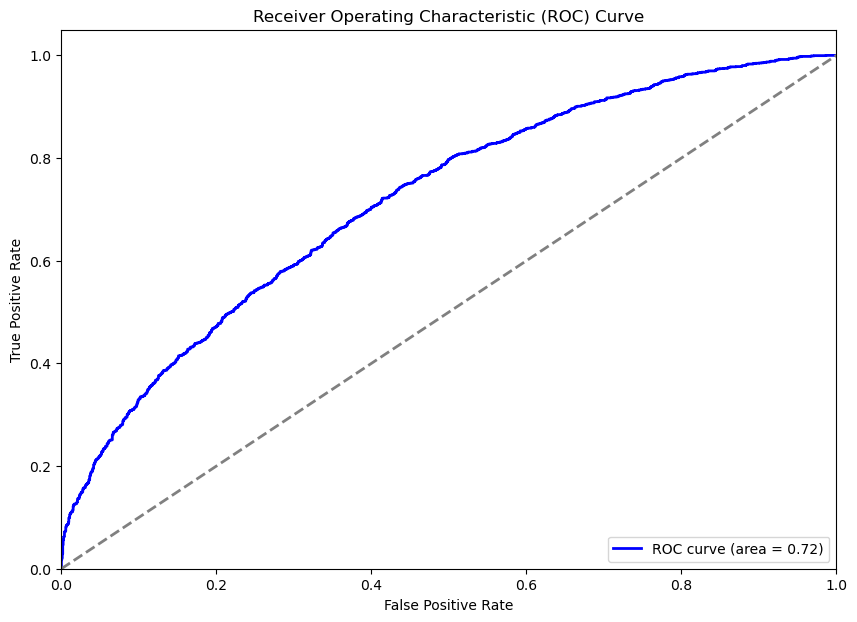

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score, fbeta_score

# Get the predicted probabilities for the training set
y_prob_train = log_reg3.predict_proba(X_train_301)[:, 1]

# Compute the ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_train)

# Compute the AUC
roc_auc_train = roc_auc_score(y_train, y_prob_train)
print(f"Area is: {roc_auc_train}")

# Plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

It does have an area of greater than 0.5, which means its predictions are distributed in a way that roughly corresponds with the underlying distribution. However, it can't distinguish between the growth vs loss very well i.e., there doesn't exist a cutoff s.t. the predicted probabilities are well-separated by that cutoff into the desired classes.

## Backtest

Here we present two backtest methods: one is to buy when predicted 1, the other is buy when predicted 0.

In [131]:
def backtest(model, X, prices):
    '''
        returns the return of the portfolio if we buy the stock when the model predicts 0
    '''
    portfolio = 1000
    predictions = model.predict(X)
    for i in range(len(X)):
        if predictions[i] == 1:
            portfolio *= prices.iloc[i]['PRC_df_qqq'] / prices.iloc[i]['OPENPRC_df_qqq']
    
    return "The return is {:.2f}%".format((portfolio - 1000) / 1000 * 100)

In [128]:
def backtest(model, X, prices):
    '''
        returns the return of the portfolio if we buy the stock when the model predicts 0
    '''
    portfolio = 1000
    predictions = model.predict(X)
    for i in range(len(X)):
        if predictions[i] == 0:
            portfolio *= prices.iloc[i]['PRC_df_qqq'] / prices.iloc[i]['OPENPRC_df_qqq']
    
    return "The return is {:.2f}%".format((portfolio - 1000) / 1000 * 100)

Rough baseline result:

In [93]:
last = len(prices_cv) - 1
print('The return is {:.2f}%'.format((prices_cv.iloc[last]['PRC_df_qqq'] - prices_cv.iloc[0]['OPENPRC_df_qqq']) / prices_cv.iloc[0]['OPENPRC_df_qqq'] * 100))

The return is 110.11%


However, we note that this is comparable because we buy at open and sell at close not at open of the next trading day. Therefore, we make the following adjustments:

In [132]:
portfolio = 1000
for i in range(len(X_cv)):
    portfolio *= prices_cv.iloc[i]['PRC_df_qqq'] / prices_cv.iloc[i]['OPENPRC_df_qqq']
print("The return is {:.2f}%".format((portfolio - 1000) / 1000 * 100))

The return is 18.20%


In [133]:
backtest(nb, X_cv, prices_cv)

'The return is 21.39%'

In [134]:
backtest(dt3, X_cv_301, prices_cv)

'The return is 27.39%'

In [135]:
backtest(qda3, X_cv_301, prices_cv)

'The return is 11.83%'

In [136]:
backtest_0_buy(nb, X_cv, prices_cv)

'The return is -2.63%'

In [ ]:
backtest_0_buy(dt3, X_cv_301, prices_cv)

'The return is -7.22%'

In [ ]:
backtest_0_buy(qda3, X_cv_301, prices_cv)

'The return is 5.69%'

## Backtest on Test Set for the Best Model

In [137]:
portfolio = 1000
for i in range(len(y_test)):
    portfolio *= prices_test.iloc[i]['PRC_df_qqq'] / prices_test.iloc[i]['OPENPRC_df_qqq']
print("The return is {:.2f}%".format((portfolio - 1000) / 1000 * 100))

The return is 27.62%


In [139]:
backtest(nb, X_test, prices_test)

'The return is 16.41%'

In [138]:
backtest(dt3, X_test_301, prices_test)

'The return is 14.24%'

In [140]:
backtest(qda3, X_test_301, prices_test)

'The return is 40.94%'

In [153]:
y_test_pred = qda3.predict(X_test_301)    
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Confusion Matrix:")
print(f"         Predicted 0  Predicted 1")
print(f"Actual 0    {conf_matrix[0, 0]}          {conf_matrix[0, 1]}")
print(f"Actual 1    {conf_matrix[1, 0]}          {conf_matrix[1, 1]}")

Accuracy: 0.5305
Precision: 0.5500
Recall: 0.7276
Confusion Matrix:
         Predicted 0  Predicted 1
Actual 0    65          153
Actual 1    70          187


In [141]:
backtest_0_buy(nb, X_test, prices_test)

'The return is 9.63%'

In [143]:
backtest_0_buy(dt3, X_test_301, prices_test)

'The return is 11.72%'

In [144]:
backtest_0_buy(qda3, X_test_301, prices_test)

'The return is -9.45%'

In [145]:
# what about buy and hold?

last = len(prices_test) - 1
print('The return is {:.2f}%'.format((prices_test.iloc[last]['PRC_df_qqq'] - prices_test.iloc[0]['OPENPRC_df_qqq']) / prices_test.iloc[0]['OPENPRC_df_qqq'] * 100))

The return is 12.58%


In the test set, the market condition is different (particularly, not so good), but QDA outperforms by a lot!